## Institut des Algorithmes du Sénégal

## Insurance Forecast using Regression models

### Different regression models that we will consider:

Regression analysis is a technique we can use to understand the relationship between one or more predictor variables and a response variable. 

- Linear Regression
- Polynomial Regression
- Ridge Regression
- Lasso Regression
- Support Vector Regression
- Decision Tree Regression
- Random Forest Regression
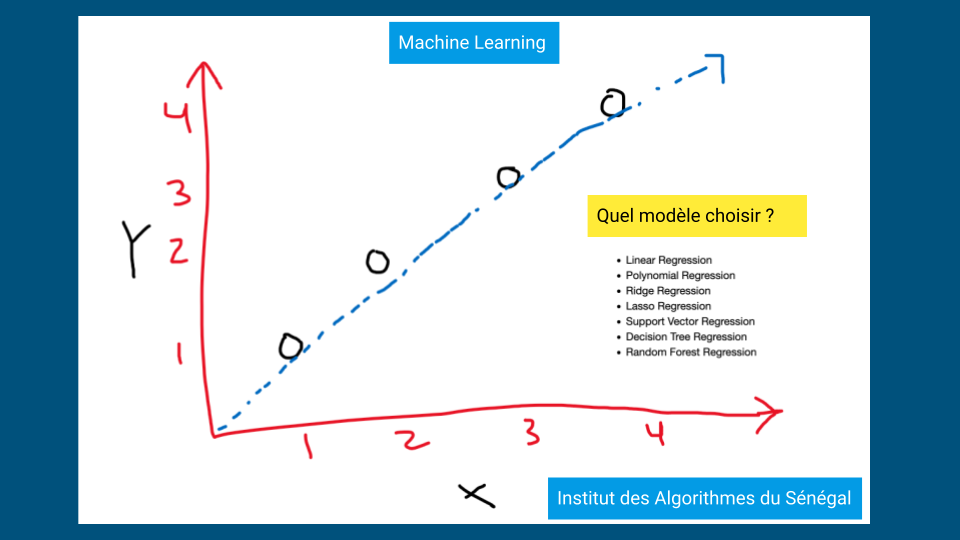

In [30]:
# importing libraries

import numpy as np # data manipulation
import pandas as pd # data manipulation
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization
%matplotlib inline

In [32]:
# importing the dataset
df = pd.read_csv("insurance.csv")

# viewing top 5 rows
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Overviewing Columns:

- age: age of primary beneficiary
- sex:  gender..female, male
- bmi: body mass index, providing an understanding of body, weights that are relatively high or low relative to   height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
- children: number of children covered by health insurance / number of dependents
- smoker: smoking
- region: the beneficiary's residential area.
- charges: individual medical costs billed by health insurance.

## Data Cleaning and Feature Engineering

In [33]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

There is no NAN in the data

In [34]:
df.count()

age         1338
sex         1338
bmi         1338
children    1338
smoker      1338
region      1338
charges     1338
dtype: int64

In [35]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## One-Hot encoding

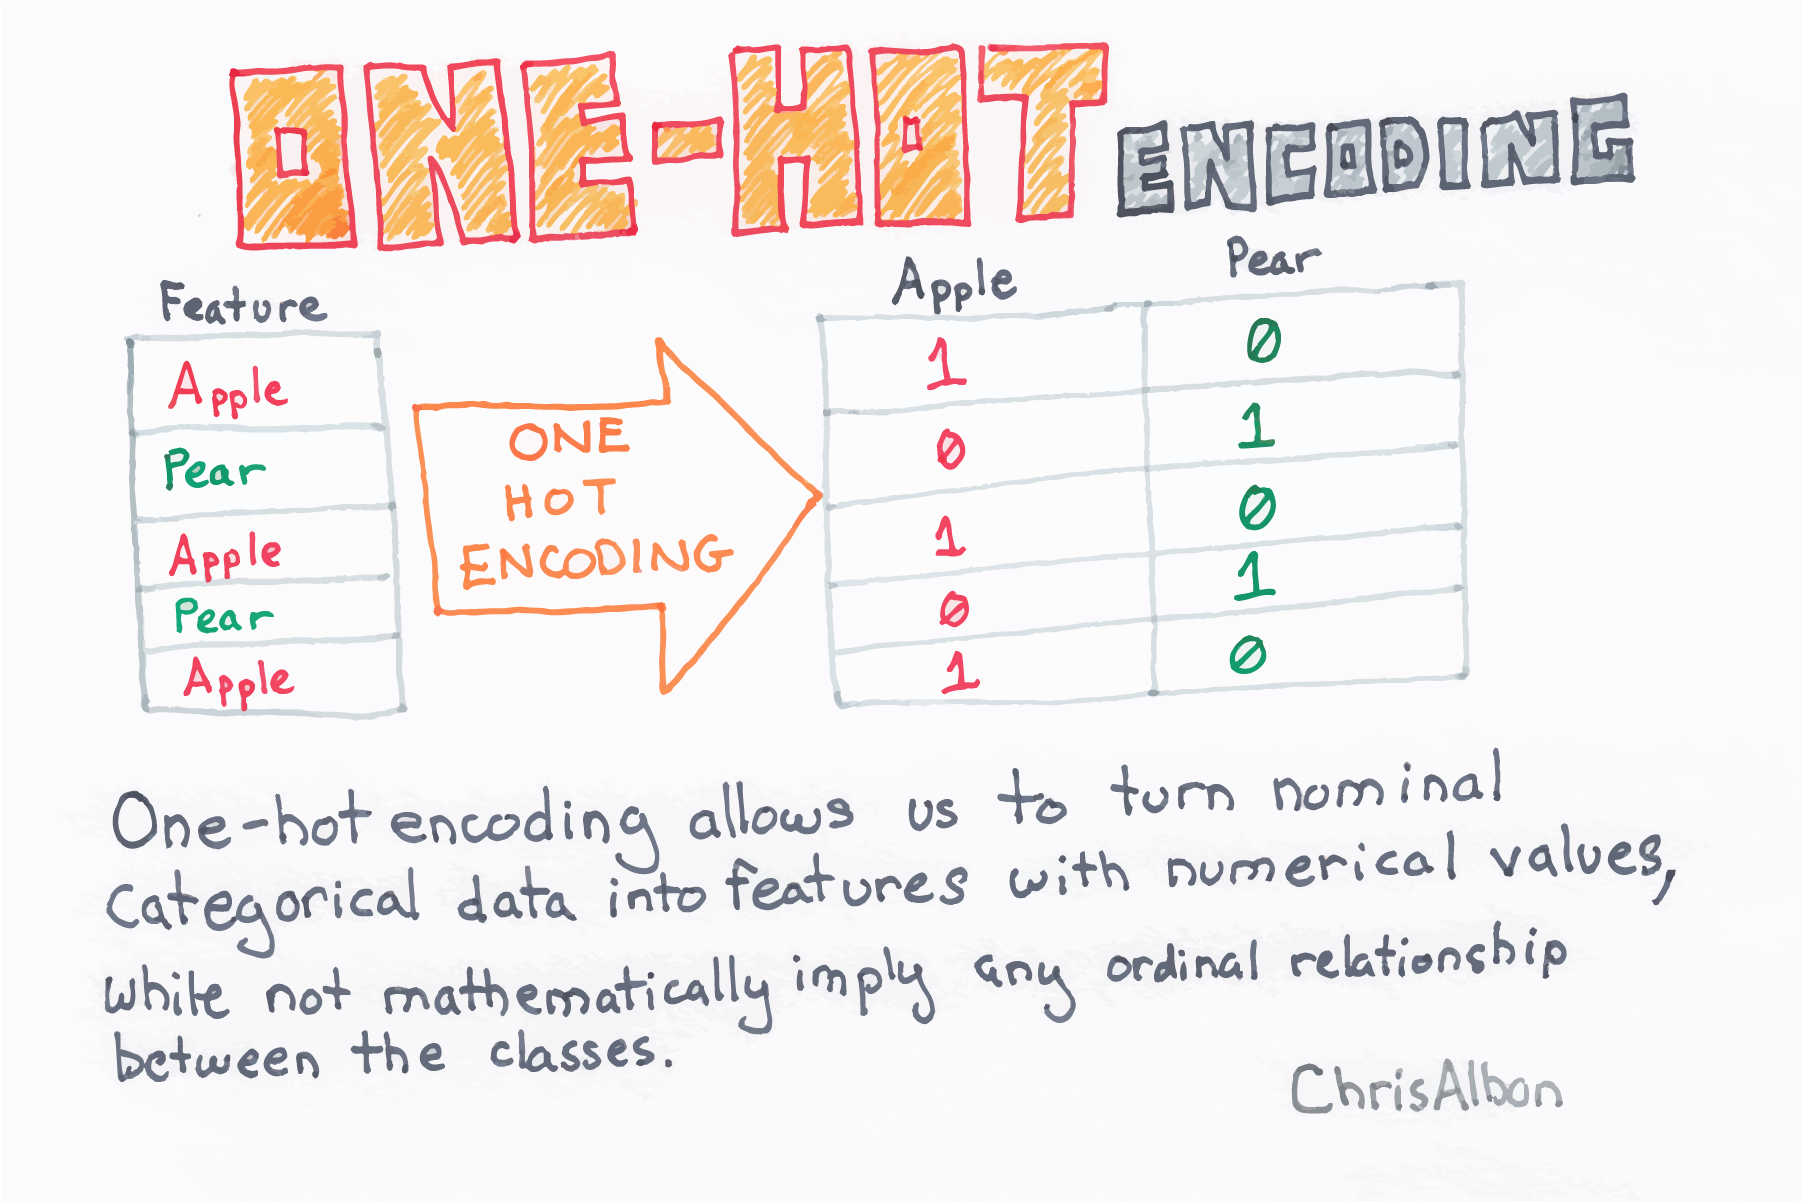

In [36]:
# encoding
Male = pd.get_dummies(df['sex'], drop_first=True)
df = pd.concat([df, Male], axis=1 )

smoker = pd.get_dummies(df['smoker'], drop_first=True)
df = pd.concat([df, smoker], axis=1 )

region = pd.get_dummies(df['region'])
df = pd.concat([df, region], axis=1 )

In [37]:
df.head()

,age,sex,bmi,children,smoker,region,charges,male,yes,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,0,0,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0,0,0,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0,0,0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0,0,1,0,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0,0,1,0,0


## Data Visualization

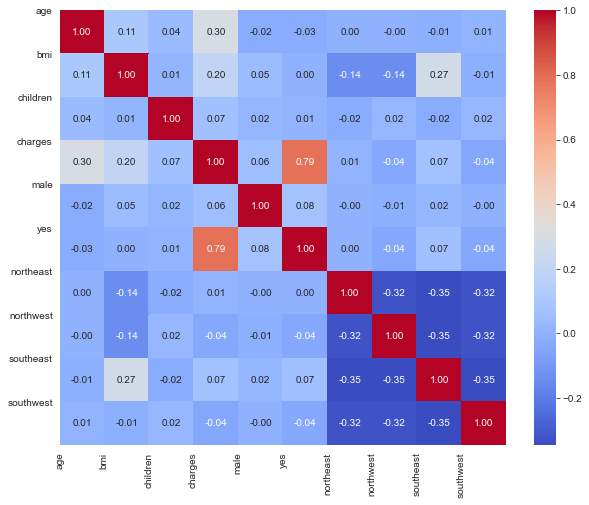

In [38]:
corr = df.corr()# Par defaut == "person"

#Plot figsize
fig, ax = plt.subplots(figsize=(10, 8))## define the figure and its size

#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f")# annot = True : annotation

plt.xticks(range(len(corr.columns)), corr.columns)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()


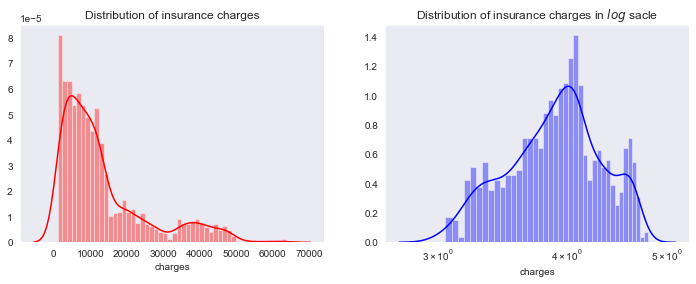

In [39]:
fig = plt.figure(figsize=(12,4))

ax=fig.add_subplot(121)
sns.distplot(df['charges'],bins=50,color='r',ax=ax)
ax.set_title('Distribution of insurance charges')

ax=fig.add_subplot(122)
sns.distplot(np.log10(df['charges']),bins=40,color='b',ax=ax)
ax.set_title('Distribution of insurance charges in $log$ sacle')
ax.set_xscale('log')

## Clusters of persons

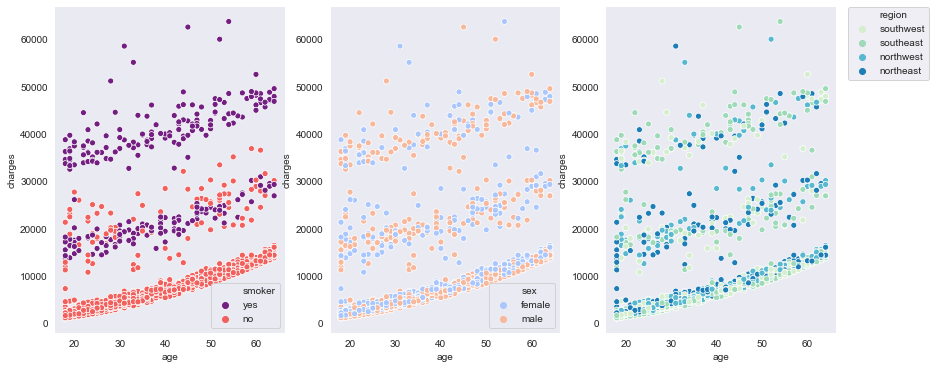

In [40]:
fig, ax =plt.subplots(nrows= 1, ncols = 3, figsize= (14,6))
sns.scatterplot(x='age', y='charges', data=df, palette='magma',hue='smoker',ax=ax[0])
sns.scatterplot(x='age', y='charges', data=df, palette='coolwarm',hue='sex',ax=ax[1])
sns.scatterplot(x='age', y='charges', data=df, palette='GnBu',hue='region',ax=ax[2])
sns.set_style('dark')
sns.despine(left=True)
plt.legend(bbox_to_anchor=(1.05, 1),loc=2, borderaxespad=0.)

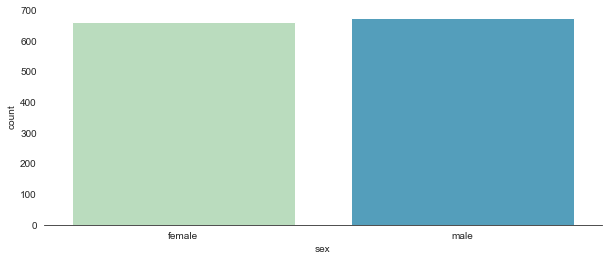

In [41]:
plt.figure(figsize=(10,4))
sns.set_style('white')
sns.countplot(x='sex', data = df, palette='GnBu')
sns.despine(left=True)

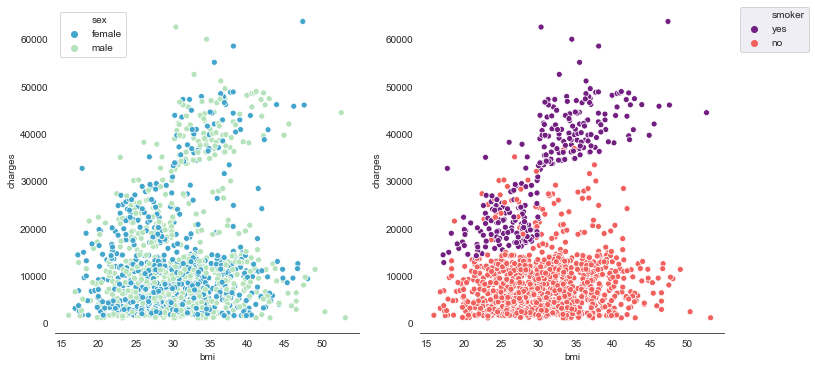

In [42]:
fig, ax =plt.subplots(nrows= 1, ncols = 2, figsize= (12,6))
sns.scatterplot(x='bmi', y='charges', data = df, palette='GnBu_r', hue='sex', ax=ax[0])
sns.scatterplot(x='bmi', y='charges', data = df, palette='magma', hue='smoker', ax=ax[1])
sns.set_style('dark')
sns.despine(left=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [43]:
df.head()

,age,sex,bmi,children,smoker,region,charges,male,yes,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,0,0,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0,0,0,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0,0,0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0,0,1,0,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0,0,1,0,0


## Linear Regression


## 1. Simple linear regression

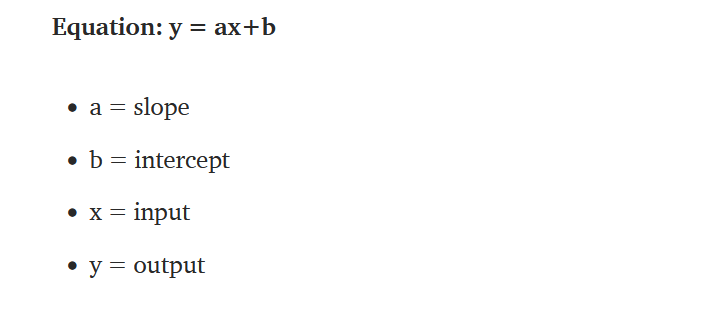

## 2. Multiple linear regression


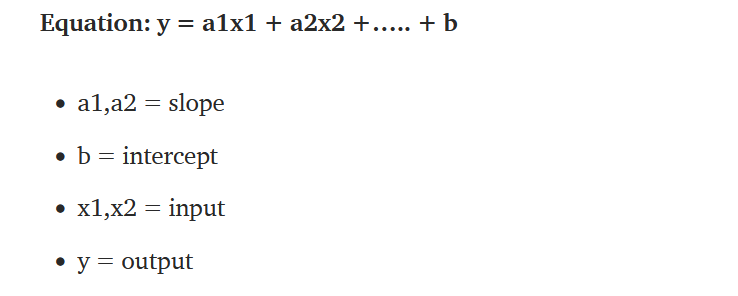

## 3. Polynomial regression

* In simple linear regression algorithm only works when the relationship between the data is linear But suppose if we have non-linear data then Linear regression will not capable to draw a best-fit line and It fails in such conditions. consider the below diagram which has a non-linear relationship and you can see the Linear regression results on it, which does not perform well means which do not comes close to reality. Hence, we introduce polynomial regression to overcome this problem, which helps identify the curvilinear relationship between independent and dependent variables.
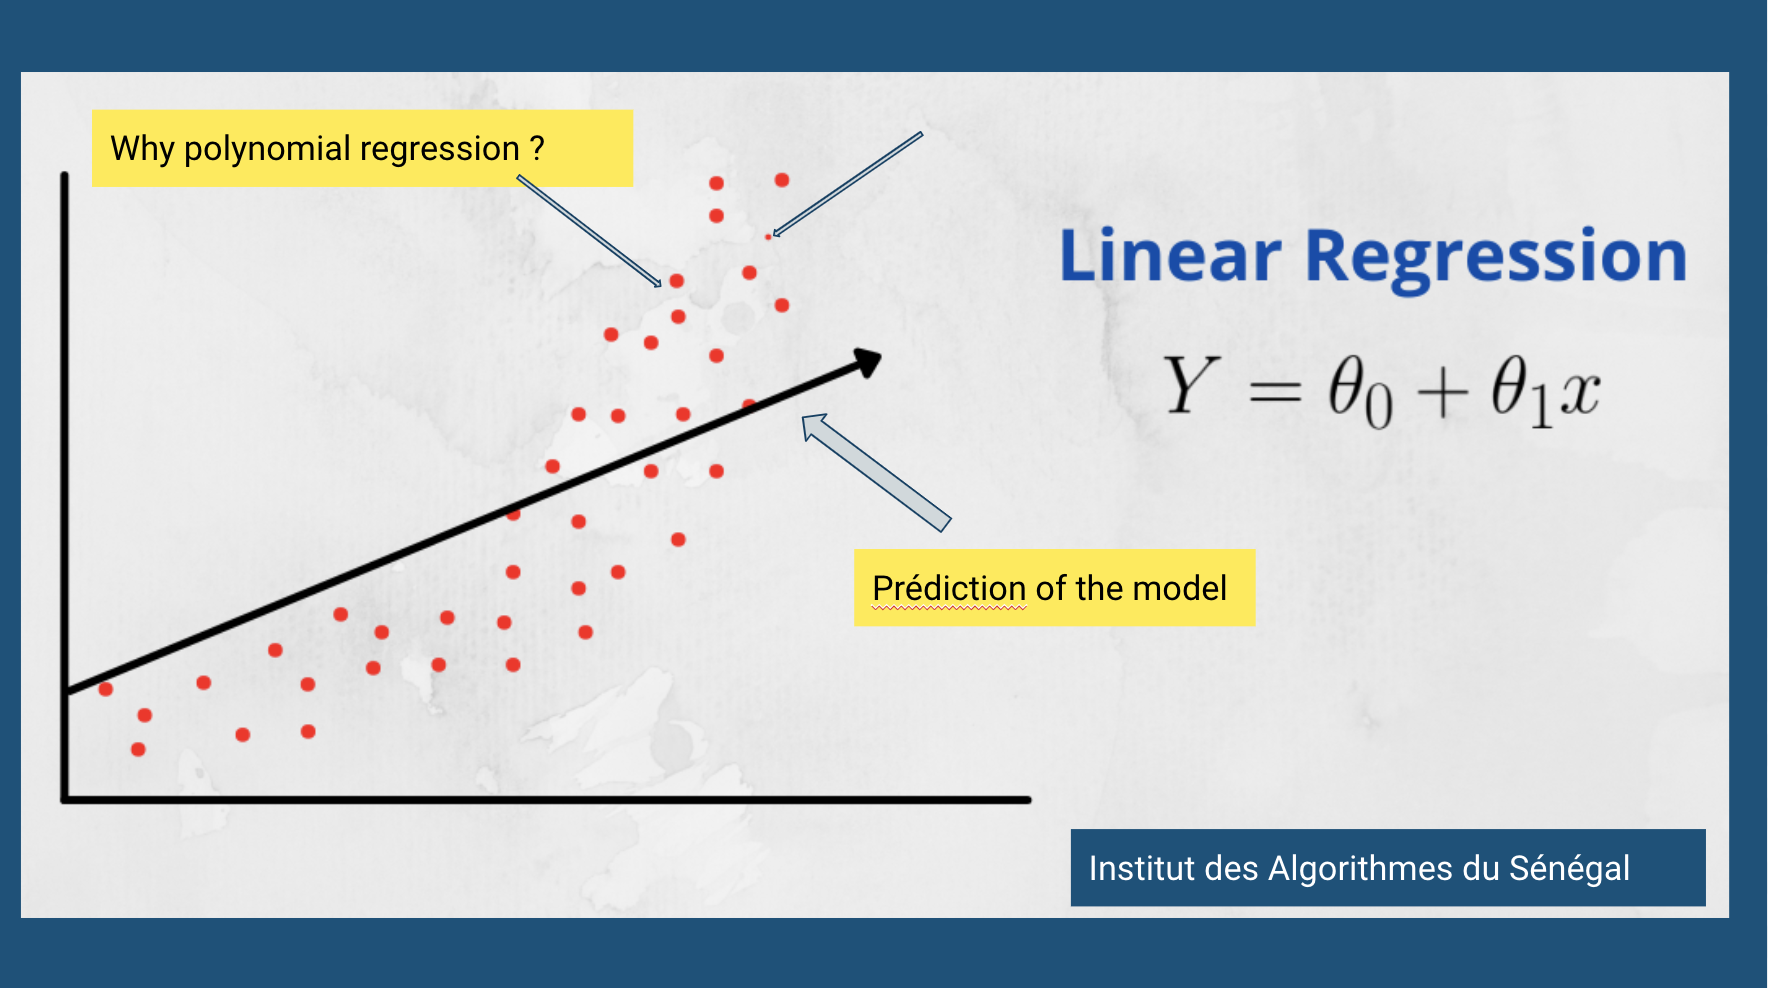



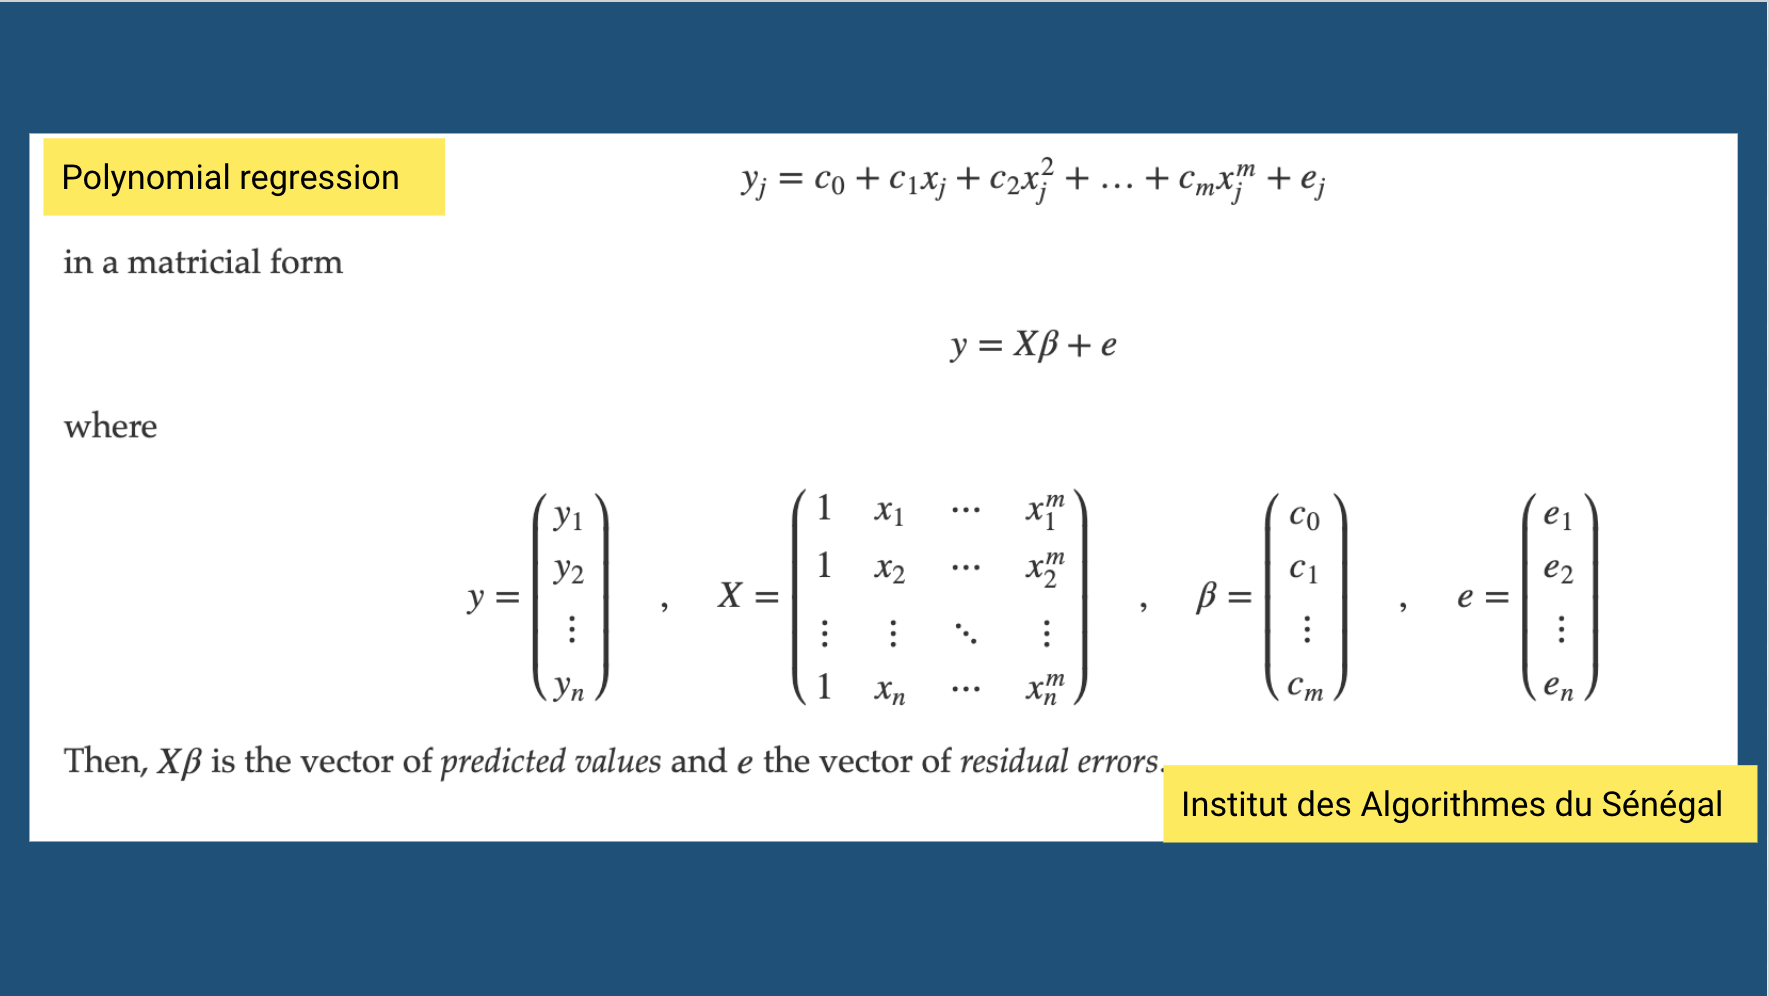

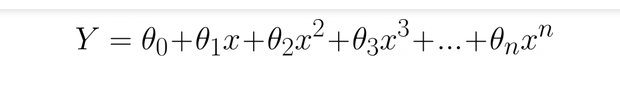

Where :
* $\theta$0 is the bias
* $\theta$1,...$\theta$n are the weights in the equation of the polynomial regression,
* n is the degree of the polynomial


## Regularization

## 1. Ridge Regresson : 

In linear regression, the optimization function or loss function is known as the residual sum of squares (RSS), which is used to define and measure the error of the model.

La régression Ridge optimise le problème qui suit :

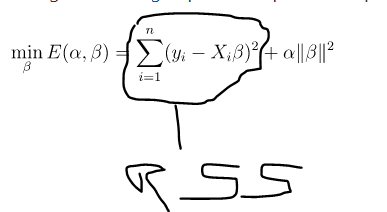

La solution de ctte équation s'exprime:

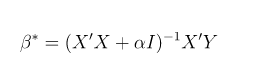

## 2. Lasso regression 
La regression lasso optimise le probléme suivant 🇰

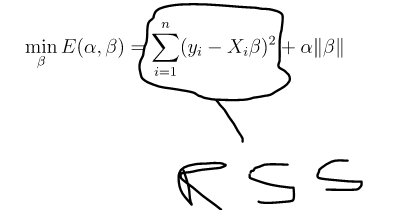

In [44]:
df = df.drop(['sex', 'smoker', 'region'], axis=1)
df.head()

,age,bmi,children,charges,male,yes,northeast,northwest,southeast,southwest
0,19,27.900,0,16884.92400,0,1,0,0,0,1
1,18,33.770,1,1725.55230,1,0,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,0,1,0
3,33,22.705,0,21984.47061,1,0,0,1,0,0
4,32,28.880,0,3866.85520,1,0,0,1,0,0


In [45]:
X=df.drop('charges', axis=1)  # independent variable
y=df['charges'] # dependent variable
# y = ax + b

In [47]:
# splitting the dataset into train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)
# X_train === 80% des données X
# X_test == 20 % des données X

In [49]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (1070, 9)
Shape of X_test:  (268, 9)
Shape of y_train:  (1070,)
Shape of y_test (268,)


In [50]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Quelques metriques de performances

* Cross validation : The goal of cross-validation is to test the model's ability to predict new data that was not used in estimating it

* One way to assess how well a regression model fits a dataset is to calculate the root mean square error, which is a metric that tells us the average distance between the predicted values from the model and the actual values in the dataset.

The lower the RMSE, the better a given model is able to “fit” a dataset.

    
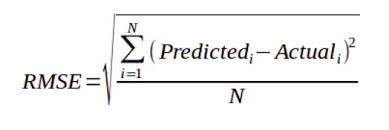

In [51]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error

# Predicting Cross Validation Score of the Test set
cv_linear = cross_val_score(estimator = lr, X = X, y = y, cv = 10)

# Predicting R2 Score of the Train set 
y_pred_linear_train = lr.predict(X_train)## Phase d'apprentissage
r2_score_linear_train = r2_score(y_train, y_pred_linear_train)

# Predicting R2 Score of the Test set 
y_pred_linear_test = lr.predict(X_test)## Phase test
r2_score_linear_test = r2_score(y_test, y_pred_linear_test)

# Predicting MAE and RMSE of the Test set 
rmse_linear = (np.sqrt(mean_squared_error(y_test, y_pred_linear_test)))
mae_linear = mean_absolute_error(y_test, y_pred_linear_test)

# printing the results
print("CV: ", cv_linear.mean())
print('R2_score (train): ', r2_score_linear_train)
print('R2_score (test): ', r2_score_linear_test)
print("MAE: ", mae_linear)
print("RMSE: ", rmse_linear)


CV:  0.7445006998667605
R2_score (train):  0.7496651495857667
R2_score (test):  0.7546729001405783
MAE:  4190.605817290256
RMSE:  6107.914005596757


## Polynomial Regression

- Sometimes, the trend of data is not really linear, and looks curvy. In this case we can use Polynomial Regression methods.


- The relationship between the input variable x and the output variable y is modeled as an nth degree polynomial in x.

In [52]:
# creating the polynomial features and the regressor model
from sklearn.preprocessing import PolynomialFeatures

ply_reg = PolynomialFeatures(degree = 2)
X_ply = ply_reg.fit_transform(X)

X_train_ply = ply_reg.fit_transform(X_train)
ply_reg.fit(X_train_ply, y_train)

regressor_ply = LinearRegression()
regressor_ply.fit(X_train_ply, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [53]:
# Predicting Cross Validation Score of the Test set
cv_ply = cross_val_score(estimator = regressor_ply, X = X_ply, y = y, cv = 10)

# Predicting R2 Score of the Train set
y_pred_ply_train = regressor_ply.predict(ply_reg.fit_transform(X_train))## apprentissage == prédiction
r2_score_ply_train = r2_score(y_train, y_pred_ply_train)

# Predicting R2 Score of the Test set
y_pred_ply_test = regressor_ply.predict(ply_reg.fit_transform(X_test))
r2_score_ply_test = r2_score(y_test, y_pred_ply_test)

# Predicting MAE and RMSE of the Test set
rmse_ply = (np.sqrt(mean_squared_error(y_test, y_pred_ply_test)))
mae_ply = mean_absolute_error(y_test, y_pred_ply_test)

# printing the results
print('CV: ', cv_ply.mean())
print('R2_score (train): ', r2_score_ply_train)
print('R2_score (test): ', r2_score_ply_test)
print("MAE:", mae_ply)
print("RMSE: ", rmse_ply)


CV:  0.7919980851138156
R2_score (train):  0.8518702469250299
R2_score (test):  0.8255747221623717
MAE: 2928.0999647299395
RMSE:  5150.209115748038


## Ridge Regression

In [21]:
from sklearn.preprocessing import StandardScaler # for feature scaling
from sklearn.pipeline import Pipeline # for using pipeline
from sklearn.linear_model import Ridge  # for ridege regression

steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Ridge())
]

ridge_pipe = Pipeline(steps)

In [22]:
# Applying Grid Search to find the best model and the best parameters

from sklearn.model_selection import GridSearchCV  # for hypertuning

parameters =  {  'model__alpha' : [43],
                 'model__fit_intercept' : [True],
                 'model__tol' : [0.0001],
                 'model__solver' : ['auto'],
                'model__random_state': [42] 
}

regressor_ridge = GridSearchCV(ridge_pipe, parameters, cv=10)
regressor_ridge = regressor_ridge.fit(X, y.ravel())

In [23]:
print(regressor_ridge.best_score_)
print(regressor_ridge.best_params_)

0.8363491525351024
{'model__alpha': 43, 'model__fit_intercept': True, 'model__random_state': 42, 'model__solver': 'auto', 'model__tol': 0.0001}


In [24]:
# Predicting Cross Validation Score of the Test set
cv_ridge = regressor_ridge.best_score_

# Predicting R2 Score of the Train set 
y_pred_ridge_train = regressor_ridge.predict(X_train)
r2_score_ridge_train = r2_score(y_train, y_pred_ridge_train)

# Predicting R2 Score of the Test set
y_pred_ridge_test = regressor_ridge.predict(X_test)
r2_score_ridge_test = r2_score(y_test, y_pred_ridge_test)

# Predicting MAE and RMSE of the Test set
rmse_ridge = (np.sqrt(mean_squared_error(y_test, y_pred_ridge_test)))
mae_ridge = mean_absolute_error(y_test, y_pred_ridge_test)

# printing the results
print('CV: ', cv_ridge.mean())
print('R2_score (train): ', r2_score_ridge_train)
print('R2_score (test): ', r2_score_ridge_test)
print('MAE:', mae_ridge)
print("RMSE: ", rmse_ridge)



CV:  0.8363491525351024
R2_score (train):  0.8496672745994188
R2_score (test):  0.8384309545545937
MAE: 2919.9271758623495
RMSE:  4858.901981504879


In [25]:
models = [('Linear Regression', rmse_linear, r2_score_linear_train, r2_score_linear_test, cv_linear.mean()),
          ('Polynomial Regression', rmse_ply, r2_score_ply_train, r2_score_ply_test, cv_ply.mean()) 
         ]

In [26]:
predict = pd.DataFrame(data = models, columns=['Model', 'RMSE', 'R2_Score(training)', 'R2_Score(test)', 'Cross-Validation'])
predict

,Model,RMSE,R2_Score(training),R2_Score(test),Cross-Validation
0,Linear Regression,6131.031264,0.752080,0.742754,0.744501
1,Polynomial Regression,4987.187939,0.850891,0.829787,0.791998


### Visualizing model performance

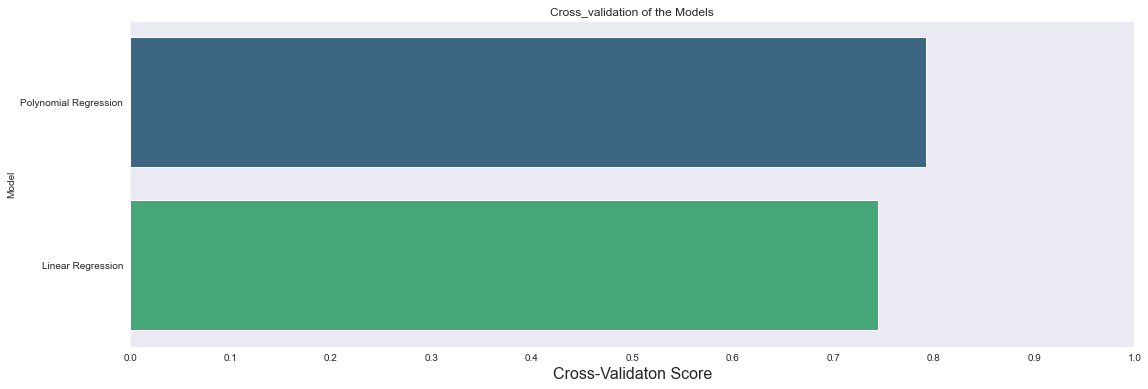

In [54]:
# comaprison of cross-validation between the models

f, axe = plt.subplots(1,1, figsize=(18,6))

predict.sort_values(by=['Cross-Validation'], ascending=False, inplace=True)

sns.barplot(x='Cross-Validation', y='Model', data = predict, ax = axe, palette='viridis')

axe.set_xlabel('Cross-Validaton Score', size=16)
axe.set_ylabel('Model')
axe.set_xlim(0,1.0)
axe.set_xticks(np.arange(0, 1.1, 0.1))
plt.title('Cross_validation of the Models')
plt.show()

Text(0.5, 0, 'Predict')

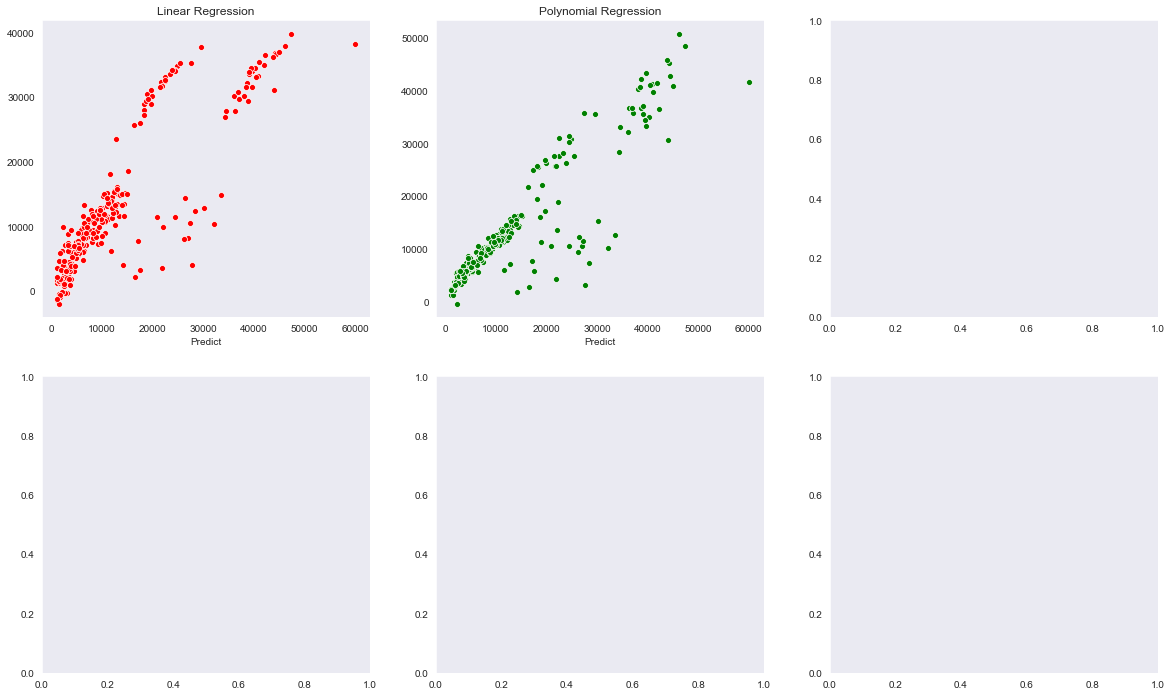

In [28]:
# comparison of R-square between the models
fig, ax = plt.subplots(2,3, figsize=(20,12))
sns.set_style('dark')
g = sns.scatterplot(y_test, y_pred_linear_test, ax=ax[0,0], color='red')
g.set_title('Linear Regression')
g.set_xlabel('Predict')


sns.set_style('dark')
h = sns.scatterplot(y_test, y_pred_ply_test, ax=ax[0,1], color='green')
h.set_title('Polynomial Regression')
h.set_xlabel('Predict')


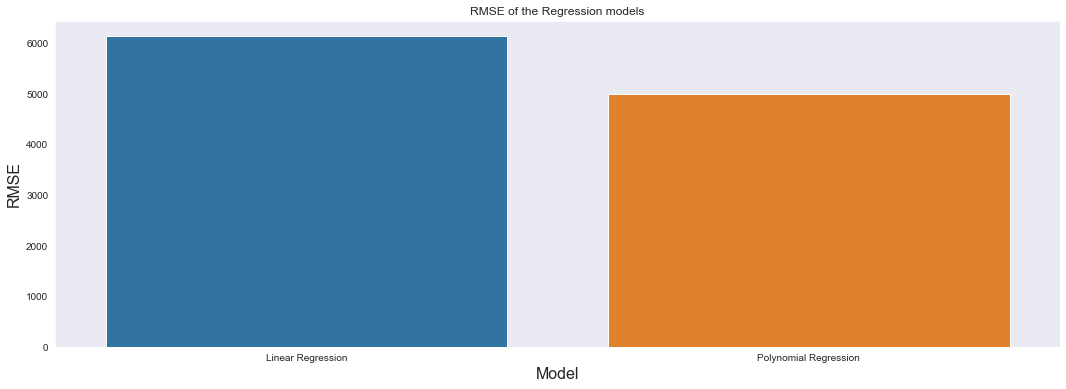

In [55]:
# comparison of RMSE between the models

predict.sort_values(by=['RMSE'], ascending=False, inplace=True)

f, axe = plt.subplots(1,1, figsize=(18,6))
sns.barplot(x='Model', y='RMSE', data=predict, ax = axe)
axe.set_xlabel('Model', size=16)
axe.set_ylabel('RMSE', size=16)
plt.title('RMSE of the Regression models')
plt.show()